In [1]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from datasets.dataloaders import load_mnist

%load_ext autoreload
%autoreload 2

In [2]:
BATCH_SIZE = 200

_, _, test_loader = load_mnist("../datasets/data/mnist_data", BATCH_SIZE)

In [3]:
from utils.MNIST_autoencoder import AETrainer, MODEL_FILENAME

ae_trainer = AETrainer(test_loader, BATCH_SIZE)
ae_trainer.load_model(MODEL_FILENAME)

In [4]:
latents = ae_trainer.get_latent_reps(test_loader)

In [5]:
distances, indices = ae_trainer.get_most_similar(latents, latents[0], 5)

In [12]:
from trainer import init_trainer

trainer = init_trainer("configs/ml_3.json", best_model=True)

 EXPERIMENT: test_mnist_l3
{'aggregator': 'SumAggregator',
 'batch_size': 200,
 'cl_sizes': [1, 10, 20],
 'concept_dim': 1,
 'concept_reg': 1,
 'concept_visualization': 'activation',
 'conceptizer': 'ConvConceptizer',
 'data_path': 'datasets/data/mnist_data',
 'dataloader': 'mnist',
 'device': 'cpu',
 'dropout': 0.5,
 'epochs': 5,
 'eval_freq': 270,
 'exp_name': 'test_mnist_l3',
 'hidden_sizes': [320, 50],
 'image_size': 28,
 'load_checkpoint': 'best_model.pt',
 'lr': 0.0002,
 'num_classes': 10,
 'num_concepts': 5,
 'parameterizer': 'ConvParameterizer',
 'print_freq': 100,
 'robust_reg': 0.001,
 'sparsity_reg': 2e-05,
 'train': True}
SENN(
  (conceptizer): ConvConceptizer(
    (encoder): ModuleList(
      (0): Sequential(
        (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
        (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (2): ReLU(inplace=True)
      )
      (1): Sequential(
        (0): Conv2d(10, 5, kernel_size=(5, 5), stride=(

In [13]:
image_indices = np.append(indices[0], 888)
image_indices = indices[0]

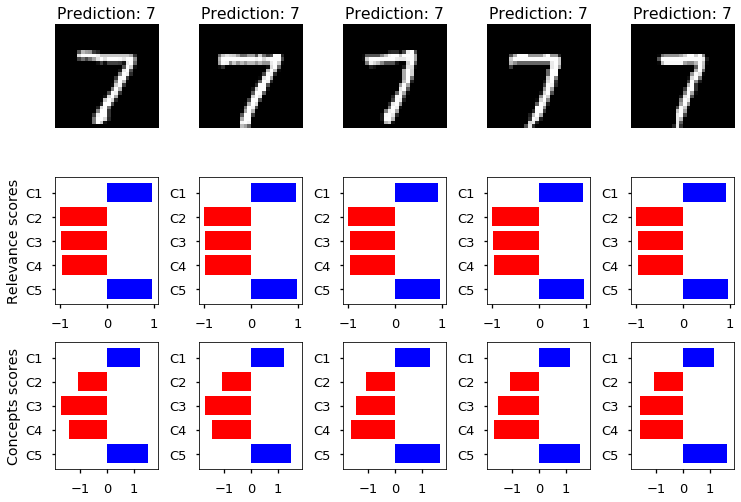

In [14]:
from utils.plot_utils import get_comparison_plot

imgs = torch.stack([test_loader.dataset[index][0] for index in image_indices])

fig = get_comparison_plot(imgs, trainer.model)
fig.tight_layout()